In [252]:
import pandas as pd
import numpy as np
import xgboost as xgb
import joblib
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Load Data

In [253]:
t_v = joblib.load('./training_vectors.pkl')
X = t_v['X']
Y = t_v['Y']

## Tunning

In [224]:
params = {
    'learning_rate': 0.1,
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 7,
    'lambda': 3,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

In [225]:
dtrain = xgb.DMatrix(X, Y)

In [226]:
num_rounds = 500

### Tune estimator

In [229]:
base = 0
for i in range(10):
    base += 50
    params['n_estimators'] = base 
    cv = xgb.cv(params, dtrain, nfold=5, metrics='rmse', num_boost_round=10)
    print(base)
    print('train_mean: {} train_std: {} test_mean: {} test_std: {}'.format(cv['train-rmse-mean'].mean(),
                                                                          cv['train-rmse-std'].mean(),
                                                                          cv['test-rmse-mean'].mean(),
                                                                          cv['test-rmse-std'].mean()))

### Tune max_depth and min_weight

In [231]:
max_depth_min_weight_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,10,2)
}

for max_depth in max_depth_min_weight_test['max_depth']:
    params['max_depth'] = max_depth
    for min_weight in max_depth_min_weight_test['min_child_weight']:
        params['min_child_weight'] = min_weight
        cv = xgb.cv(params, dtrain, nfold=5, metrics='rmse', num_boost_round=10)
        print("max_depth: {} min_weight: {}".format(max_depth, min_weight))
        print('train_mean: {} train_std: {} test_mean: {} test_std: {}'.format(cv['train-rmse-mean'].mean(),
                                                                              cv['train-rmse-std'].mean(),
                                                                              cv['test-rmse-mean'].mean(),
                                                                              cv['test-rmse-std'].mean()))

In [232]:
max_depth_min_weight_test = {
 'max_depth':[8,9,10],
 'min_child_weight':[0,1,2]
}

for max_depth in max_depth_min_weight_test['max_depth']:
    params['max_depth'] = max_depth
    for min_weight in max_depth_min_weight_test['min_child_weight']:
        params['min_child_weight'] = min_weight
        cv = xgb.cv(params, dtrain, nfold=5, metrics='rmse', num_boost_round=10)
        print("max_depth: {} min_weight: {}".format(max_depth, min_weight))
        print('train_mean: {} train_std: {} test_mean: {} test_std: {}'.format(cv['train-rmse-mean'].mean(),
                                                                              cv['train-rmse-std'].mean(),
                                                                              cv['test-rmse-mean'].mean(),
                                                                              cv['test-rmse-std'].mean()))

### Tune gamma

In [234]:
gamma_test = {
 'gamma':[i/10.0 for i in range(0,9)]
}

for gamma in gamma_test['gamma']:
    params['gamma'] = gamma
    cv = xgb.cv(params, dtrain, nfold=5, metrics='rmse', num_boost_round=10)
    print("gamma: {}".format(gamma))
    print('train_mean: {} train_std: {} test_mean: {} test_std: {}'.format(cv['train-rmse-mean'].mean(),
                                                                          cv['train-rmse-std'].mean(),
                                                                          cv['test-rmse-mean'].mean(),
                                                                          cv['test-rmse-std'].mean()))

### Tune subsample and colsample_bytree

In [236]:
subsample_colsample_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

for subsample in subsample_colsample_test['subsample']:
    params['subsample'] = subsample
    for colsample_bytree in subsample_colsample_test['colsample_bytree']:
        params['colsample_bytree'] = colsample_bytree
        cv = xgb.cv(params, dtrain, nfold=5, metrics='rmse', num_boost_round=10)
        print("subsample: {} colsample_bytree: {}".format(subsample, colsample_bytree))
        print('train_mean: {} train_std: {} test_mean: {} test_std: {}'.format(cv['train-rmse-mean'].mean(),
                                                                              cv['train-rmse-std'].mean(),
                                                                              cv['test-rmse-mean'].mean(),
                                                                              cv['test-rmse-std'].mean()))

In [237]:
subsample_colsample_test = {
 'subsample':[i/100.0 for i in range(85,95,5)],
 'colsample_bytree':[i/100.0 for i in range(85,95,5)]
}

for subsample in subsample_colsample_test['subsample']:
    params['subsample'] = subsample
    for colsample_bytree in subsample_colsample_test['colsample_bytree']:
        params['colsample_bytree'] = colsample_bytree
        cv = xgb.cv(params, dtrain, nfold=5, metrics='rmse', num_boost_round=10)
        print("subsample: {} colsample_bytree: {}".format(subsample, colsample_bytree))
        print('train_mean: {} train_std: {} test_mean: {} test_std: {}'.format(cv['train-rmse-mean'].mean(),
                                                                              cv['train-rmse-std'].mean(),
                                                                              cv['test-rmse-mean'].mean(),
                                                                              cv['test-rmse-std'].mean()))

### Tune Learning Rate

In [239]:
learning_rate_test = {
    'learning_rate': [i/100 for i in range(0,100,5)]
}


for learning_rate in learning_rate_test['learning_rate']:
    params['learning_rate'] = learning_rate
    cv = xgb.cv(params, dtrain, nfold=5, metrics='rmse', num_boost_round=10)
    print("learning_rate: {}".format(learning_rate))
    print('train_mean: {} train_std: {} test_mean: {} test_std: {}'.format(cv['train-rmse-mean'].mean(),
                                                                              cv['train-rmse-std'].mean(),
                                                                              cv['test-rmse-mean'].mean(),
                                                                              cv['test-rmse-std'].mean()))

## Train

In [247]:
plst = params.items()

In [248]:
dtrain = xgb.DMatrix(X, Y)

In [249]:
model = xgb.train(plst, dtrain, num_rounds)

In [250]:
model.save_model('./xgboosting.model')

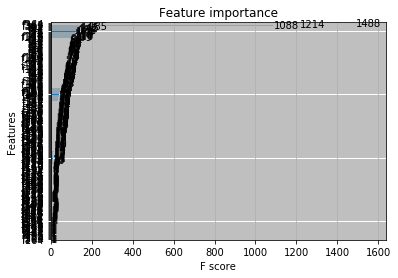

In [251]:
plot_importance(model)